In [1]:
                                #final Project on “customer_churn” Dataset

#A)	Data Manipulation:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("Customer_churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
#a. Extract the 5th column & store it in ‘customer_5’


In [6]:
customer_5=df.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [7]:
#b. Extract the 15th column & store it in ‘customer_15’

In [8]:
customer_15=df.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [9]:
#c. Extract all the male senior citizens whose Payment Method is Electronic check & 
#store the result in ‘senior_male_electronic’

In [10]:
senior_male_electronic=df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & 
                                      (df['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()


customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
20  8779-QRDMV   Male              1      No         No       1           No   
55  1658-BYGOY   Male              1      No         No      18          Yes   
57  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
78  0191-ZHSKZ   Male              1      No         No      30          Yes   
91  2424-WVHPL   Male              1      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
20  No phone service             DSL             No  ...              Yes   
55               Yes     Fiber optic             No  ...               No   
57               Yes     Fiber optic             No  ...              Yes   
78                No             DSL            Yes  ...               No   
91                No     Fiber optic             No  ...               No   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
20          No          No             Yes  Month-to-month              Yes   
55          No         Yes             Yes  Month-to-month              Yes   
57         Yes         Yes             Yes        One year              Yes   
78          No         Yes             Yes  Month-to-month              Yes   
91         Yes          No              No  Month-to-month               No   

       PaymentMethod MonthlyCharges  TotalCharges Churn  
20  Electronic check          39.65         39.65   Yes  
55  Electronic check          95.45       1752.55   Yes  
57  Electronic check         108.45       7076.35    No  
78  Electronic check          74.75        2111.3    No  
91  Electronic check          74.70          74.7    No  

[5 rows x 21 columns]

In [11]:
# d. Extract all those customers whose tenure is greater than 70 months or their 
# Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [12]:
customer_total_tenure=df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8   7892-POOKP  Female              0     Yes         No      28          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
8            Yes     Fiber optic             No  ...              Yes   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
8          Yes         Yes             Yes  Month-to-month              Yes   
12          No         Yes             Yes        One year               No   
13          No         Yes             Yes  Month-to-month              Yes   
14         Yes         Yes             Yes  Month-to-month              Yes   
15         Yes         Yes             Yes        Two year               No   

                PaymentMethod MonthlyCharges  TotalCharges Churn  
8            Electronic check         104.80       3046.05   Yes  
12    Credit card (automatic)         100.35        5681.1    No  
13  Bank transfer (automatic)         103.70        5036.3   Yes  
14           Electronic check         105.50       2686.05    No  
15    Credit card (automatic)         113.25       7895.15    No  

[5 rows x 21 columns]

In [13]:
#f. Extract 333 random records from the customer_churndataframe& store the result in 
#‘customer_333’

In [14]:
customer_333=df.sample(n=333)
customer_333.head()


customerID gender  SeniorCitizen Partner Dependents  tenure  \
2465  1740-CSDJP   Male              0      No         No       1   
4744  6139-ZZRBQ   Male              1      No         No      64   
823   0295-QVKPB   Male              0      No         No       5   
3858  0840-DCNZE   Male              0      No         No      47   
2164  5453-YBTWV   Male              0     Yes        Yes      70   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
2465           No  No phone service             DSL                   No  ...   
4744          Yes                No              No  No internet service  ...   
823           Yes                No             DSL                   No  ...   
3858          Yes                No             DSL                  Yes  ...   
2164          Yes                No     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
2465                   No                   No                   No   
4744  No internet service  No internet service  No internet service   
823                   Yes                  Yes                  Yes   
3858                  Yes                  Yes                  Yes   
2164                  Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
2465                  Yes  Month-to-month              Yes   
4744  No internet service        Two year              Yes   
823                    No  Month-to-month              Yes   
3858                  Yes        One year              Yes   
2164                   No        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
2465  Bank transfer (automatic)          35.25         35.25   Yes  
4744  Bank transfer (automatic)          20.05       1198.05    No  
823     Credit card (automatic)          63.95         318.1    No  
3858  Bank transfer (automatic)          86.95        4138.9    No  
2164    Credit card (automatic)         101.10        6994.8    No  

[5 rows x 21 columns]

In [15]:
#g. Get the count of different levels from the ‘Churn’ column


In [16]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
###B) Data Visualization:

In [18]:
#a. Build a bar-plot for the ’InternetService’ column:
#i. Set x-axis label to ‘Categories of Internet Service’
#ii. Set y-axis label to ‘Count of Categories’
#iii. Set the title of plot to be ‘Distribution of Internet Service’
#iv. Set the color of the bars to be ‘orange

Text(0.5, 1.0, 'Distribution of Internet Service')

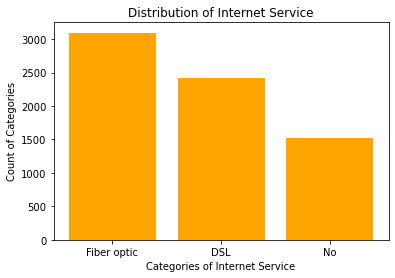

In [20]:
X=df['InternetService'].value_counts().keys().tolist()
Y=df['InternetService'].value_counts().tolist()
plt.bar(X,Y,color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')


In [21]:
#b. Build a histogram for the ‘tenure’ column:
#i. Set the number of bins to be 30 
#ii. Set the color of the bins to be ‘green’
#iii. Assign the title ‘Distribution of tenure’


Text(0.5, 1.0, 'Distribution of tenure')

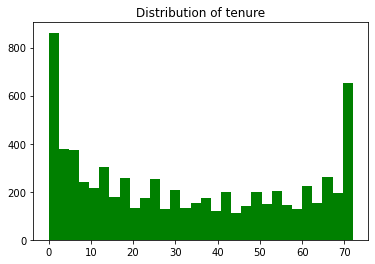

In [22]:
plt.hist(df['tenure'],bins=30,color='green')
plt.title('Distribution of tenure')

In [23]:
##D) Logistic Regression: 
#a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ & 
#independent variable is ‘MonthlyCharges’
#i. Divide the dataset in 65:35 ratio 
#ii. Build the model on train set and predict the values on test set 
#iii. Build the confusion matrix and get the accuracy score 

In [24]:
logisticRegression_x=pd.DataFrame(df['MonthlyCharges'])
logisticRegression_y=df['Churn']

In [25]:
logisticRegression_x_train,logisticRegression_x_test,logisticRegression_y_train,logisticRegression_y_test=train_test_split(logisticRegression_x,logisticRegression_y,train_size=0.65,random_state=0)

In [27]:
logisticRegression=LogisticRegression()
logisticRegression.fit(logisticRegression_x_train,logisticRegression_y_train)

LogisticRegression()

In [28]:
logisticRegression_y_pred=logisticRegression.predict(logisticRegression_x_test)

In [29]:
logisticRegression_cm=confusion_matrix(logisticRegression_y_pred,logisticRegression_y_test)
logisticRegression_cm

array([[1815,  651],
       [   0,    0]], dtype=int64)

In [30]:
logisticRegression_score=accuracy_score(logisticRegression_y_pred,logisticRegression_y_test)
logisticRegression_score

0.7360097323600974

In [31]:
#b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & 
#independent variables are ‘tenure’ & ‘MonthlyCharges’
#i. Divide the dataset in 80:20 ratio 
#ii. Build the model on train set and predict the values on test set 
#iii. Build the confusion matrix and get the accuracy score 


In [33]:
multipleLogisticRegression_x=pd.DataFrame(df.loc[:,['MonthlyCharges','tenure']])
multipleLogisticRegression_y=df['Churn']



In [34]:
# try to do this

In [35]:
###E) Decision Tree: 
#a. Build a decision tree model where dependent variable is ‘Churn’ & independent 
#variable is ‘tenure’
#i. Divide the dataset in 80:20 ratio 
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and calculate the accuracy

In [36]:
decisionTreeClassifier_x=pd.DataFrame(df['tenure'])
decisionTreeClassifier_y=df['Churn']

In [37]:
decisionTreeClassifier_x_train,decisionTreeClassifier_x_test,decisionTreeClassifier_y_train,decisionTreeClassifier_y_test=train_test_split(decisionTreeClassifier_x,decisionTreeClassifier_y,test_size=0.20,random_state=0)

In [38]:
decisionTreeClassifier=DecisionTreeClassifier()
decisionTreeClassifier.fit(decisionTreeClassifier_x_train,decisionTreeClassifier_y_train)

DecisionTreeClassifier()

In [39]:
decisionTreeClassifier_y_pred=decisionTreeClassifier.predict(decisionTreeClassifier_x_test)

In [40]:
decisionTreeClassifier_cm=confusion_matrix(decisionTreeClassifier_y_pred,decisionTreeClassifier_y_test)
decisionTreeClassifier_cm

array([[965, 281],
       [ 76,  87]], dtype=int64)

In [41]:
decisionTreeClassifier_score=accuracy_score(decisionTreeClassifier_y_pred,decisionTreeClassifier_y_test)
decisionTreeClassifier_score

0.7466288147622427

In [42]:
#F) Random Forest: 
##a. Build a Random Forest model where dependent variable is ‘Churn’ & independent 
#variables are ‘tenure’ and ‘MonthlyCharges’
#i. Divide the dataset in 70:30 ratio 
#ii. Build the model on train set and predict the values on test set 
#iii. Build the confusion matrix and calculate the accuracy

In [43]:
randomForestClassifier_x=df[['tenure','MonthlyCharges']]
randomForestClassifier_y=df['Churn']

In [44]:
randomForestClassifier_x_train,randomForestClassifier_x_test,randomForestClassifier_y_train,randomForestClassifier_y_test=train_test_split(randomForestClassifier_x,randomForestClassifier_y,test_size=0.30,random_state=0)

In [45]:
randomForestClassifier=RandomForestClassifier(n_estimators=100)
randomForestClassifier.fit(randomForestClassifier_x_train,randomForestClassifier_y_train)

RandomForestClassifier()

In [46]:
randomForestClassifier_y_pred=randomForestClassifier.predict(randomForestClassifier_x_test)

In [47]:
randomForestClassifier_cm=confusion_matrix(randomForestClassifier_y_pred,randomForestClassifier_y_test)
randomForestClassifier_cm

array([[1345,  327],
       [ 215,  226]], dtype=int64)

In [48]:
randomForestClassifier_score=accuracy_score(randomForestClassifier_y_pred,randomForestClassifier_y_test)
randomForestClassifier_score

0.7434926644581165